In [ ]:
%%capture
!pip install gradio

In [ ]:
import gradio as gr
print(gr.__version__)


5.15.0


# Basic concepts and terminology

We will dive into Gradio by learning its key concepts and terminology through a “Hello World” example:

When you run the above code in a cell, the output will be a small interactive interface that returns a custom greeting message:

In [ ]:
def greet(name):
   return f"Hello, {name}!"

demo = gr.Interface(
   fn=greet,
   inputs=['text'],
   outputs="text",
)


Gradio revolves around a few key concepts:

1. Interface: the core class for creating UIs.
2. Components: Input and output elements like text boxes, images and audio. There are more than 30 built-in components as of now.
3. Functions: Python functions that processes the information from the input components and returns the results to display with output components.
4. Launch: The method to start your Gradio app.

Above, we created a greet function that takes and returns a text input. For this reason, the input and output components are specified as text inside the Interface class.

In the end, we are calling the launch method, which starts a local server. To make the UI available to anyone, you can set the share parameter to True. This will start an SSH tunnel and deploy the Gradio app to a publicly shareable webpage:

In [ ]:
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dc72f2eab1f0bd89e0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Gradio Components

You will spend most of your time tinkering around different components and how to place them on the page while building Gradio apps. So, let’s take a closer look at what you have at your disposal.
Input and output components

Gradio offers a wide array of components for building interactive interfaces. These components are generally divided into two categories: input and output.

Input components allow users to provide data to the underlying processor (this can be any Python function). Some common inputs are:

*   Textbox
*   Image
*   Audio
*   Slider
*   Dropdown

Here is a dummy interface that uses some of the components above:

In [ ]:
def process_inputs(text, image, audio, number, option):
   # Process inputs and return results
   return f"Processed: {text}, {number}, {option}"

In [ ]:
demo = gr.Interface(
   fn=process_inputs,
   inputs=[
       gr.Textbox(label="Enter text"),
       gr.Image(label="Upload image"),
       gr.Audio(label="Upload audio"),  # Uncomment this line to add audio input
       gr.Slider(0, 100, label="Choose a number"),
       gr.Dropdown(["Streamlit", "Taipy", "Gradio"], label="Select a UI library"),
   ],
   outputs="text",
)

demo.launch(share=True, debug=True)

NameError: name 'gr' is not defined

In this example, the process_inputs function requires five parameters. Therefore, we need to create five input components and pass them to inputs. While the number of input components should match the number of required function parameters, this is not a strict rule. To avoid errors and warnings, set default values for parameters that do not require user input from the UI.


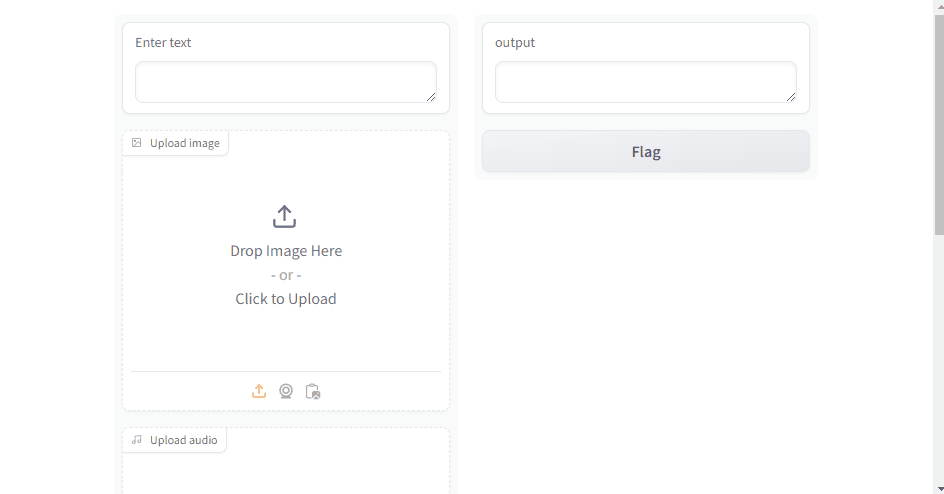

Notice how we are using a Textbox class to specify the input component instead of a plain string text like the first example. It is always recommended to use dedicated classes to specify input and output components to make them customizable. For example, all component classes have a useful label attribute, while Slider and Dropdown have arguments to specify the range and available options.

Many input components can be used to display output as well. Here are some common scenarios:


*   Label: For displaying text or classification results
*   Image: For showing processed or generated images
*   Audio: For playing processed or generated audio
*   Plot: For displaying graphs or charts

Like inputs, the number of output components must match the number of returned values from the processing function.

# Customizing component appearance

Gradio allows you to customize the appearance of your components to suit your needs. Here is an example that uses customized text boxes:

In [ ]:
demo = gr.Interface(
   fn=lambda x: int(x) ** 7,
   inputs=gr.Textbox(
       lines=5,
       placeholder="Enter any number...",
       label="Custom textbox",
       info="This is a customized textbox component to raise any number to the power of 7.",
   ),
   outputs=gr.Textbox(label="And the number is...", show_copy_button=True),
)
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f47c726ec89fa22c25.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2018, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1567, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://f47c726ec89fa22c25.gradio.live


In this example, we’ve customized the Textbox components by specifying the number of lines, adding a placeholder and info text, and including a copy button for the output.

Experiment with different components and their properties to create interfaces that best suit your AI application’s requirements. To find out what kind of properties you can change for your component, you can visit its docs, or better yet, use the ? operand in Jupyter Lab after its class name:

In [ ]:
gr.Audio?


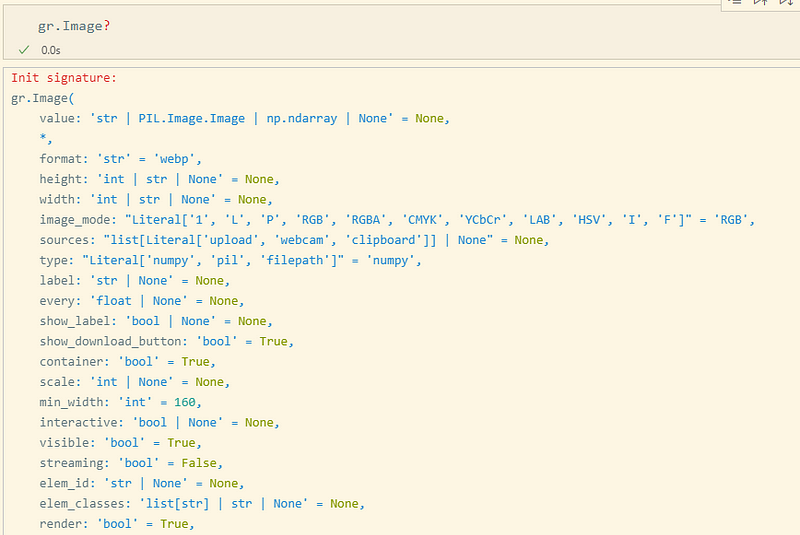

# Building Interfaces For Classic ML Models - Example 1


**Available at:** https://www.datacamp.com/tutorial/ci-cd-for-machine-learning

In [ ]:
!pip install skops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 4.1 MB/s eta 0:00:00


## Loading the Dataset

We will use pandas to load our CSV file, shuffle it using the sample function, and display the top three rows.


**Available at:**
https://www.kaggle.com/code/anubhabswain/drug-classification-decision-trees/input

In [ ]:
import pandas as pd

drug_df = pd.read_csv("https://raw.githubusercontent.com/kingabzpro/CICD-for-Machine-Learning/refs/heads/main/Data/drug.csv")
drug_df = drug_df.sample(frac=1)
drug_df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
128,47,M,LOW,NORMAL,33.542,DrugY
34,53,M,NORMAL,HIGH,14.133,drugX
103,56,M,NORMAL,HIGH,8.966,drugX


## Train Test Split

Create a dependent variable and an independent variable. Then split them into training and testing sets. This will help you to evaluate the performance of your model.

In [ ]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

## Machine Learning Pipelines

We will build a processing pipeline using ColumnTransformer, which will convert categorical values into numbers, fill in missing values, and scale the numerical columns.

After that, we'll create a training pipeline that will take the transformed data and train a random forest classifier.

Finally, we'll train the model.

By using pipelines, we can ensure reproducibility, modularity, and clarity in our code.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3]
num_col = [0,4]

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col),
        ("num_imputer", SimpleImputer(strategy="median"), num_col),
        ("num_scaler", StandardScaler(), num_col),
    ]
)
pipe = Pipeline(
    steps=[
        ("preprocessing", transform),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

## Model Evaluation

Evaluate the performance of the model by calculating both the accuracy and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 100.0% F1: 1.0


Our model has performed exceptionally well.

Create the metrics file and save it in the Results folder.

In [ ]:
!mkdir Results
!touch 'Results/metrics.txt'

In [ ]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {round(accuracy, 2) }, F1 Score = {round(f1, 2)}.")

We will then create the confusion matrix and save the image file into the Results folder.

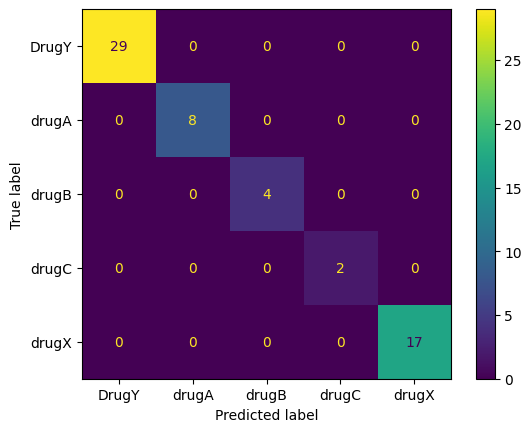

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

## Saving the Model

We will now save our model using the skops Python package. This will help us save both the scikit-learn pipeline and model.

In [ ]:
!mkdir Model

In [ ]:
import skops.io as sio

sio.dump(pipe, "Model/drug_pipeline.skops")

You can just load the entire pipeline, and it will work out of the box without processing your data or making edits to the code.

**Here there is an error:**

In [ ]:
sio.load("Model/drug_pipeline.skops", trusted=True)

TypeError: trusted must be a list of strings. Before version 0.10 trusted could be a boolean, but this is no longer supported, due to a reported CVE-2024-37065. You can pass the output of `get_untrusted_types` as trusted to load the data. Be sure to review the output of the function before passing it as trusted.

In [ ]:
unknown_types = sio.get_untrusted_types(file="./Model/drug_pipeline.skops")
print(unknown_types)
sio.load("./Model/drug_pipeline.skops", trusted=unknown_types)

['numpy.dtype']


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

Copy and paste the entire code into the 'train.py' file. This will be the standardized training script that will run in CI workflow whenever there is a change in the data or code.

In [ ]:
pipe = sio.load("./Model/drug_pipeline.skops", trusted=unknown_types)

In [ ]:
import gradio as gr

def predict_drug(age, sex, blood_pressure, cholesterol, na_to_k_ratio):
    """Predict drugs based on patient features.

    Args:
        age (int): Age of patient
        sex (str): Sex of patient
        blood_pressure (str): Blood pressure level
        cholesterol (str): Cholesterol level
        na_to_k_ratio (float): Ratio of sodium to potassium in blood

    Returns:
        str: Predicted drug label
    """
    features = [age, sex, blood_pressure, cholesterol, na_to_k_ratio]
    predicted_drug = pipe.predict([features])[0]

    label = f"Predicted Drug: {predicted_drug}"
    return label


inputs = [
    gr.Slider(15, 74, step=1, label="Age"),
    gr.Radio(["M", "F"], label="Sex"),
    gr.Radio(["HIGH", "LOW", "NORMAL"], label="Blood Pressure"),
    gr.Radio(["HIGH", "NORMAL"], label="Cholesterol"),
    gr.Slider(6.2, 38.2, step=0.1, label="Na_to_K"),
]
outputs = [gr.Label(num_top_classes=5)]

examples = [
    ["M", "M", "HIGH", "NORMAL", 15.4],
    [35, "F", "LOW", "NORMAL", 8],
    [50, "M", "HIGH", "HIGH", 34],
]


title = "Drug Classification"
description = "Enter the details to correctly identify Drug type?"
article = "This app is a part of the **[Beginner's Guide to CI/CD for Machine Learning](https://www.datacamp.com/tutorial/ci-cd-for-machine-learning)**. It teaches how to automate training, evaluation, and deployment of models to Hugging Face using GitHub Actions."


gr.Interface(
    fn=predict_drug,
    inputs=inputs,
    outputs=outputs,
    examples=examples,
    title=title,
    description=description,
    article=article,
    theme=gr.themes.Citrus(),
).launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ec56293d760e976f39.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2018, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1567, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://ec56293d760e976f39.gradio.live


# Building Interfaces For Classic ML Models - Example 2

Now, let’s build an interface for a classic tabular regression model. We will use the Diamonds dataset, which is available in Seaborn.

Start by creating a new working directory and a new script named app.py inside.

This loads the data, processes it using a Scikit-learn Pipeline and trains a RandomForestRegression model.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import gradio as gr

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")


In [ ]:
# Prepare the features and target
X = diamonds.drop("price", axis=1)
y = diamonds["price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the preprocessing steps
numeric_features = ["carat", "depth", "table", "x", "y", "z"]
categorical_features = ["cut", "color", "clarity"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)


# Create a pipeline with preprocessing and model
model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
    ]
)

# Fit the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

The next step is to create a processing function that accepts the same number of inputs as there are features in the Diamonds dataset:

In [ ]:
# Create the Gradio interface
def predict_price(carat, cut, color, clarity, depth, table, x, y, z):

   input_data = pd.DataFrame(
       {
           "carat": [carat],
           "cut": [cut],
           "color": [color],
           "clarity": [clarity],
           "depth": [depth],
           "table": [table],
           "x": [x],
           "y": [y],
           "z": [z],
       }
   )

   prediction = model.predict(input_data)[0]
   return f"Predicted Price: ${prediction:.2f}"

The function converts those inputs into a DataFrame and passes it to the .predict() method of the trained model pipeline. In the end, it returns a string with the predicted price.

Now, the Interface class must match this function's signature: nine input components for processing the features and one output for displaying the predicted price:

In [ ]:
iface = gr.Interface(
   fn=predict_price,
   inputs=[
       gr.Slider(
           minimum=diamonds["carat"].min(),
           maximum=diamonds["carat"].max(),
           label="Carat",
       ),
       gr.Dropdown(["Fair", "Good", "Very Good", "Premium", "Ideal"], label="Cut"),
       gr.Dropdown(["D", "E", "F", "G", "H", "I", "J"], label="Color"),
       gr.Dropdown(
           ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], label="Clarity"
       ),
       gr.Slider(
           minimum=diamonds["depth"].min(),
           maximum=diamonds["depth"].max(),
           label="Depth",
       ),
       gr.Slider(
           minimum=diamonds["table"].min(),
           maximum=diamonds["table"].max(),
           label="Table",
       ),
       gr.Slider(minimum=diamonds["x"].min(), maximum=diamonds["x"].max(), label="X"),
       gr.Slider(minimum=diamonds["y"].min(), maximum=diamonds["y"].max(), label="Y"),
       gr.Slider(minimum=diamonds["z"].min(), maximum=diamonds["z"].max(), label="Z"),
   ],
   outputs="text",
   title="Diamond Price Predictor",
   description="Enter the characteristics of a diamond to predict its price.",
)


nside the class, we create three dropdowns for the categorical features. The options are filled in with the unique categories in each feature. We also create six slider components to accept numeric features. The ranges of sliders are determined by the minimum and maximum values of each feature.

All we have to do now is execute the script to run and deploy the app:

In [ ]:
iface.launch(share=True, debug = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cd025d148a3c793b73.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7862 <> https://cd025d148a3c793b73.gradio.live


# Building Interfaces For LLMs - Gradio App on Hugging Face Spaces

Start by connecting instantiating a Client object and connecting it to a Gradio app that is running on Hugging Face Spaces.

In [ ]:
import gradio as gr
hf_token = " "
whisper = gr.load("models/openai/whisper-small", token=hf_token)

def transcribe(audio):
    return whisper(audio)

gr.Interface(transcribe, gr.Audio(type="filepath"), gr.Textbox() ).launch(share=True, debug=True)

Fetching model from: https://huggingface.co/openai/whisper-small
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f84619350d28a01475.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2088, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1635, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^

In [ ]:

def transcribe(hf_token, audio):
  try:
      whisper = gr.load("models/openai/whisper-small", token=hf_token)
      output = whisper(audio)
      return output["text"]
  except Exception as e:
      return f"Error: {str(e)}"


iface = gr.Interface(
   fn=transcribe,
   inputs=[
       gr.Textbox(
           placeholder="Enter your Hugging Face key",
           type="password",
           label="Hugging Face Key",
       ),
       gr.Audio(type="filepath")],
   outputs=gr.Textbox(label="Transcription", show_copy_button=True),
   title="English Transcription",
   description="Transcribe using Whisper model. Enter your Hugging Face Token, the audio you want to transcribe.",
)
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://60783df5adba2cf2b1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Fetching model from: https://huggingface.co/openai/whisper-small


# Building Interfaces For LLMs

Let’s put everything we’ve learned together by creating two real-world text and image-based interfaces that are powered by LLMs.

First, we will build a language translator from English to Turkish, Spanish, or Chinese:

In [ ]:
%%capture
!pip install openai

In [ ]:
import openai  # pip install openai

# openai.base_url = "https://api.pawan.krd/cosmosrp/v1/chat/completions"


def translate_text(api_key, text, target_language):

   openai.api_key = api_key  # Set openai API key OR the key obtained on Discord.

   language_map = {
       "Turkish": "Turkish",
       "Spanish": "Spanish",
       "Chinese": "Chinese (Simplified)",
   }
   prompt = f"Translate the following Portuguese text to {language_map[target_language]}:\n\Portuguese: {text}\n\n{target_language} translation:"
   try:
       response = openai.chat.completions.create(
           model="gpt-3.5-turbo",
           messages=[
               {"role": "system", "content": "You are a professional translator."},
               {"role": "user", "content": prompt},
           ],
       )
       translation = response.choices[0].message.content.strip()
       return translation
   except Exception as e:
       return f"Error: {str(e)}"

Initially, we define a translate_text function. In its body, we set the OpenAI API key and create a language map. Then, we construct the prompt for translation. Then, inside a try-except block, we send a request to the ChatCompletion endpoint with a system prompt. In the end, we return the first choice.

Now, we can build the interface:

In [ ]:
iface = gr.Interface(
   fn=translate_text,
   inputs=[
       gr.Textbox(
           placeholder="Enter your OpenAI API key",
           type="password",
           label="OpenAI API Key",
       ),
       gr.Textbox(
           lines=4,
           placeholder="Enter Portuguese text to translate...",
           label="English Text",
       ),
       gr.Dropdown(choices=["Turkish", "Spanish", "Chinese"], label="Target Language"),
   ],
   outputs=gr.Textbox(label="Translation", show_copy_button=True),
   title="Portuguese to Turkish/Spanish/Chinese Translator",
   description="Translate Portuguese text to Turkish, Spanish, or Chinese using OpenAI's GPT-3-5 model. Enter your OpenAI API key, the text you want to translate, and select the target language.",
)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://533b3d12aa73a34884.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


The code is simple, like those of earlier interfaces, but we are introducing a couple of new properties:

* type argument of text boxes change the plain-text input field to password input, hiding the text.
* title and description arguments of Interface class adds an H1 title and a subtitle to the top center of the page.

Here is the result:

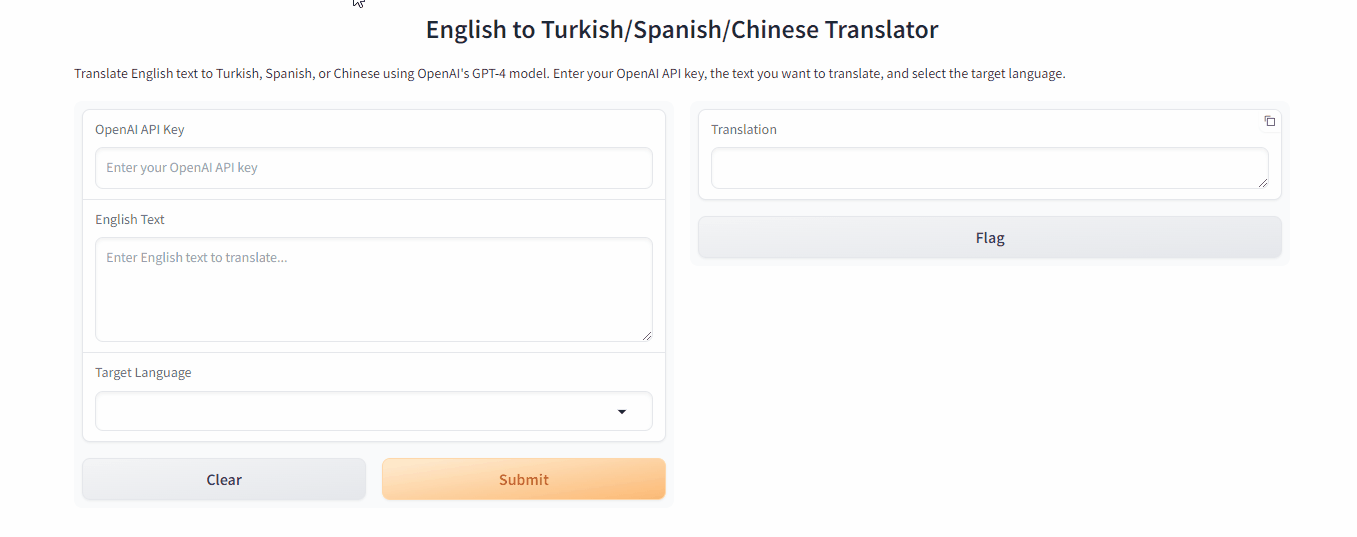

You might wonder why we are asking user’s API key as part of the app rather than provide it ourselves. The reason has got to do with how Gradio deploys UIs.

If we provided our own API key as an environment variable (which is standard practice), the publicly shareable app version wouldn’t work as it wouldn’t have access to our environment variables. In the deployment section, we will see how to fix this by deploying our apps to HuggingFace spaces.